In [1]:
import numpy as np
import pandas as pd
import cx_Oracle as co 

In [2]:
#DAO(Data Access Object) : DeptDAO
class DeptDAO(object):
    def __init__(self):
        self.dsnString = co.makedsn("192.168.0.68","1521",service_name="orcl")
        self.user = 'scott'
        self.password = 'tiger'
    #조회하는 기능
    def query_all(self):
        sql = 'select * from dept'
        conn = co.connect(user=self.user , password =self.password, dsn = self.dsnString)
        print(conn)
        query_result = pd.read_sql(sql,conn)
        conn.close()
        return query_result 
    def insertOne(self,data):
        sql = 'insert into dept values (:1,:2,:3)'
        conn = co.connect(user=self.user , password =self.password, dsn = self.dsnString)
        cursor = conn.cursor()
        cursor.execute(sql,data)
        conn.commit()
        conn.close()
    
    def updateDept(self ,data):
        dList = list(data)
        dList[0],dList[1],dList[2] = dList[1],dList[2],dList[0]
        data = tuple(dList)
        
        sql = 'update dept set dname = :1 , loc= :2 where deptno =:3'
        conn = co.connect(user=self.user , password =self.password, dsn = self.dsnString)
        cursor = conn.cursor()
        cursor.execute(sql,data)
        conn.commit()
        conn.close()
        
    def deleteDept(self,data):
        sql = 'delete dept where deptno = :1 '
        conn = co.connect(user=self.user , password =self.password, dsn = self.dsnString)
        cursor = conn.cursor()
        cursor.execute(sql,data)
        conn.commit()
        conn.close()
        

In [3]:

dept = DeptDAO()
dept.dsnString

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=192.168.0.68)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))'

In [4]:
dept.query_all()

<cx_Oracle.Connection to scott@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=192.168.0.68)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>


,DEPTNO,DNAME,LOC
0,8,cat,street
1,4,catcat,yyyy
2,4,catcat,go
3,8,cat,street
4,5,k,kk
5,5,k,kk
6,8,cat,street
7,20,RESEARCH,DALLAS
8,30,SALES,CHICAGO
9,40,OPERATIONS,BOSTON


In [5]:
dept.insertOne((7,"a","a"))

In [6]:
dept.query_all()

<cx_Oracle.Connection to scott@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=192.168.0.68)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>


,DEPTNO,DNAME,LOC
0,8,cat,street
1,4,catcat,yyyy
2,4,catcat,go
3,7,a,a
4,8,cat,street
5,5,k,kk
6,5,k,kk
7,8,cat,street
8,20,RESEARCH,DALLAS
9,30,SALES,CHICAGO


In [7]:
dept.updateDept(('b','b',7))

DatabaseError: ORA-01722: 수치가 부적합합니다

In [8]:
dept.query_all()

<cx_Oracle.Connection to scott@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=192.168.0.68)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>


,DEPTNO,DNAME,LOC
0,8,cat,street
1,4,catcat,yyyy
2,4,catcat,go
3,7,a,a
4,8,cat,street
5,5,k,kk
6,5,k,kk
7,8,cat,street
8,20,RESEARCH,DALLAS
9,30,SALES,CHICAGO


In [9]:
dept.deleteDept((7,))

In [10]:
dept.query_all()

<cx_Oracle.Connection to scott@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=192.168.0.68)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>


,DEPTNO,DNAME,LOC
0,8,cat,street
1,4,catcat,yyyy
2,4,catcat,go
3,8,cat,street
4,5,k,kk
5,5,k,kk
6,8,cat,street
7,20,RESEARCH,DALLAS
8,30,SALES,CHICAGO
9,40,OPERATIONS,BOSTON


In [11]:
dept.updateDept((5,'k','kk'))

In [12]:
dept.query_all()

<cx_Oracle.Connection to scott@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=192.168.0.68)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=orcl)))>


,DEPTNO,DNAME,LOC
0,8,cat,street
1,4,catcat,yyyy
2,4,catcat,go
3,8,cat,street
4,5,k,kk
5,5,k,kk
6,8,cat,street
7,20,RESEARCH,DALLAS
8,30,SALES,CHICAGO
9,40,OPERATIONS,BOSTON


In [13]:
s1 = pd.Series([1,2,3,4],index=['a','b','c','d'])
s1

a    1
b    2
c    3
d    4
dtype: int64

In [14]:
s2 = pd.Series([5,6,7,8],index=['a','b','c','d'])
s2

a    5
b    6
c    7
d    8
dtype: int64

In [15]:
s1 + s2

a     6
b     8
c    10
d    12
dtype: int64

In [16]:
df1 =pd.DataFrame(np.arange(9).reshape(3,3),columns =list('abc'),index =['서울','도쿄','뉴욕'])
df1

,a,b,c
서울,0,1,2
도쿄,3,4,5
뉴욕,6,7,8


In [17]:
#컬럼명 a b c 
#인덱스 서울 도쿄 뉴욕 

 


In [18]:
#0~11 까지 4행3열 컬럼명 abc . 서울도쿄뉴욕북경 
df2 = pd.DataFrame(np.arange(12).reshape(4,3),columns=list('abc'),index=['서울','도쿄','뉴욕','북경'])
df2

,a,b,c
서울,0,1,2
도쿄,3,4,5
뉴욕,6,7,8
북경,9,10,11


In [19]:
df3 = df1 + df2

In [20]:
type(df3.a)

pandas.core.series.Series

In [21]:
np.mean(df3.a)

6.0

In [22]:
df3['a']['북경'] = np.mean(df3.a)

In [23]:
df3

,a,b,c
뉴욕,12.0,14.0,16.0
도쿄,6.0,8.0,10.0
북경,6.0,NaN,NaN
서울,0.0,2.0,4.0


In [24]:
df3.mean(axis=1)

뉴욕    14.0
도쿄     8.0
북경     6.0
서울     2.0
dtype: float64

In [25]:
df3.mean(axis=0)

a     6.0
b     8.0
c    10.0
dtype: float64

In [26]:
df3.loc[:,'a']

뉴욕    12.0
도쿄     6.0
북경     6.0
서울     0.0
Name: a, dtype: float64

In [27]:
df3.loc['북경']['a'] = 3

In [28]:
df3

,a,b,c
뉴욕,12.0,14.0,16.0
도쿄,6.0,8.0,10.0
북경,3.0,NaN,NaN
서울,0.0,2.0,4.0


In [29]:
df3.loc['북경']['a'] = np.mean(df3.a)

In [30]:
df3.loc['북경']['b'] = np.mean(df3.b)

In [31]:
df3.loc['북경']['c'] = np.mean(df3.c)

In [32]:
df3

,a,b,c
뉴욕,12.00,14.0,16.0
도쿄,6.00,8.0,10.0
북경,5.25,8.0,10.0
서울,0.00,2.0,4.0


In [33]:
df1.add(df2,fill_value=0) #NaN 은 0을로 채워

,a,b,c
뉴욕,12.0,14.0,16.0
도쿄,6.0,8.0,10.0
북경,9.0,10.0,11.0
서울,0.0,2.0,4.0


In [34]:
df = pd.DataFrame([[1.4,np.nan],[7,-4.5],[np.NaN,np.NaN],[0.5,-1]],index=['a','b','c','d'],columns=['one','two'])
df

,one,two
a,1.4,NaN
b,7.0,-4.5
c,NaN,NaN
d,0.5,-1.0


In [35]:
#모든 데이터가 NaN인 레코드를 삭제
df.dropna(how='all')

,one,two
a,1.4,NaN
b,7.0,-4.5
d,0.5,-1.0


In [36]:
df.fillna(0)

,one,two
a,1.4,0.0
b,7.0,-4.5
c,0.0,0.0
d,0.5,-1.0


In [37]:
df.count()

one    3
two    2
dtype: int64

In [38]:
df.mean()

one    2.966667
two   -2.750000
dtype: float64

In [39]:
df.mean(axis=1)

a    1.40
b    1.25
c     NaN
d   -0.25
dtype: float64

In [40]:
df.sum(axis=0)

one    8.9
two   -5.5
dtype: float64

In [41]:
df.mean(axis=0)

one    2.966667
two   -2.750000
dtype: float64

In [42]:
df.mean(axis=0 , skipna= False)

one   NaN
two   NaN
dtype: float64

In [43]:
df.std(0)

one    3.521837
two    2.474874
dtype: float64

In [44]:
df.std(1)

a         NaN
b    8.131728
c         NaN
d    1.060660
dtype: float64

In [45]:
df.quantile()

one    1.40
two   -2.75
Name: 0.5, dtype: float64

In [46]:
df.quantile(0.25)

one    0.950
two   -3.625
Name: 0.25, dtype: float64

In [47]:
df.describe()

,one,two
count,3.000000,2.000000
mean,2.966667,-2.750000
std,3.521837,2.474874
min,0.500000,-4.500000
25%,0.950000,-3.625000
50%,1.400000,-2.750000
75%,4.200000,-1.875000
max,7.000000,-1.000000


In [48]:
word = pd.Series(['봄','여름','가을','봄'])
word

0     봄
1    여름
2    가을
3     봄
dtype: object

In [49]:
word.describe()

count     4
unique    3
top       봄
freq      2
dtype: object

In [50]:
df1 = pd.DataFrame({'name':['둘리','뽀로로','짱구','짱아'],'dept':['영업','개발','품질관리','회계']})
df1


,dept,name
0,영업,둘리
1,개발,뽀로로
2,품질관리,짱구
3,회계,짱아


In [51]:
df2 = pd.DataFrame({'ename':['뽀로로','이순신','뽀로로','둘리'],'comm':[300,200,100,50]})
df2

,comm,ename
0,300,뽀로로
1,200,이순신
2,100,뽀로로
3,50,둘리


In [52]:
#eque join 

df3 = pd.merge(df1,df2,left_on = 'name',right_on ='ename')
df3

,dept,name,comm,ename
0,영업,둘리,50,둘리
1,개발,뽀로로,300,뽀로로
2,개발,뽀로로,100,뽀로로


In [53]:
#ename ,name 둘다 있어서 하나 지움
df3 = df3.drop('ename',axis=1)
df3

,dept,name,comm
0,영업,둘리,50
1,개발,뽀로로,300
2,개발,뽀로로,100


In [54]:
# outer join 
df4 = pd.merge(df1,df2,how ='outer',left_on ='name',right_on ='ename')
df4

,dept,name,comm,ename
0,영업,둘리,50.0,둘리
1,개발,뽀로로,300.0,뽀로로
2,개발,뽀로로,100.0,뽀로로
3,품질관리,짱구,NaN,NaN
4,회계,짱아,NaN,NaN
5,NaN,NaN,200.0,이순신


In [55]:
df5 = pd.merge(df1,df2,how ='outer',left_on ='name',right_on ='ename').drop('name',axis=1)
df5

,dept,comm,ename
0,영업,50.0,둘리
1,개발,300.0,뽀로로
2,개발,100.0,뽀로로
3,품질관리,NaN,NaN
4,회계,NaN,NaN
5,NaN,200.0,이순신


In [59]:
import seaborn as sns  
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


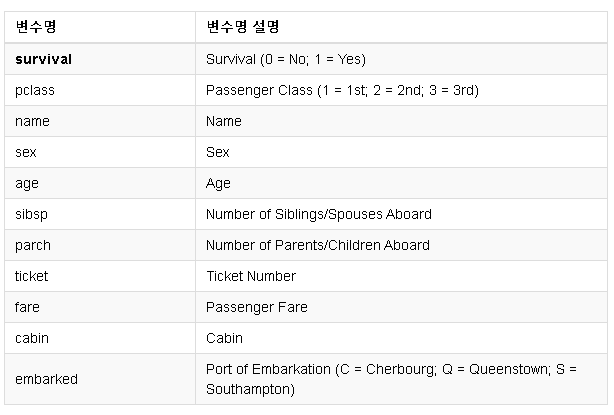

In [61]:
from IPython.display import Image
Image('titanic.png')

![title](titanic.png)
`![title](titanic.png)`

![title](https://www.python.org/static/img/python-logo.png)

`![title](https://www.python.org/static/img/python-logo.png)`

In [64]:
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [66]:
# 요금 기준으로 내림차순 정렬해서 5개만 보기 
titanic.sort_values(by =['fare'],ascending=[False]).head(5)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False


In [67]:
#요금은 내림차순 ,성별 ,올므차순 정렬해서 7개의 데이터 출력
titanic.sort_values(by =['fare','sex'],ascending=[False,True]).head(7)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [68]:
#성별 생존자 평균 
titanic.groupby('sex')

In [69]:
titanic.groupby('sex')['survived']

In [70]:
titanic.groupby('sex')[['survived']].aggregate('mean')

,survived
sex,
female,0.742038
male,0.188908


In [71]:
# titanic.groupby('sex')[['survived']].aggregate('mean').apply(함수)


In [72]:
titanic.groupby('sex')[['survived']].aggregate('mean').apply(lambda x : x-x.mean())

# def 이름없음(x):
#     return x - x.mean()



,survived
sex,
female,0.276565
male,-0.276565


In [75]:
titanic.groupby('sex')[['survived']].aggregate('mean').apply(lambda x : x/x.sum()*100)

,survived
sex,
female,79.707945
male,20.292055


In [78]:
titanic.groupby(['class','sex'])[['survived']].aggregate('mean').apply(lambda x : x/x.sum()*100)

survived
class  sex              
First  female  31.731711
       male    12.090176
Second female  30.190090
       male     5.159470
Third  female  16.388906
       male     4.439646

In [80]:
titanic.groupby(['class','sex'])[['survived']].aggregate('mean').unstack()

survived          
sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447

In [82]:
titanic.pivot_table('survived',index = 'sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt 


In [85]:
%matplotlib inline 

In [88]:
plt.style.available

['seaborn-deep',
 'ggplot',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'bmh',
 'seaborn-whitegrid',
 'grayscale',
 'fivethirtyeight',
 '_classic_test',
 'seaborn',
 'seaborn-bright',
 'dark_background',
 'fast',
 'classic',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-dark-palette',
 'tableau-colorblind10']

In [90]:
x = np.linspace(0,10,100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [91]:
#plt.plot(x,y,'포맷','선너비',라벨)


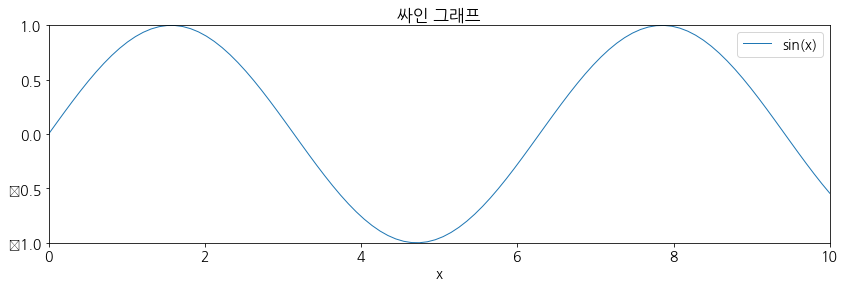

In [135]:
plt.plot(x,np.sin(x),'-',linewidth=1,label='sin(x)')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.title("싸인 그래프")
plt.xlabel('x')
plt.legend()

In [131]:
#한글 문제 해결 
from matplotlib import font_manager , rc 

In [132]:
font_path='C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
font_name 
rc('font',family = font_name)


In [133]:
mpl.matplotlib_fname()

'C:\\Users\\user\\anaconda3\\envs\\bigdata\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [134]:
font_manager.findSystemFonts(fontpaths=None,fontext="ttf")

['C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\Inkfree.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\segoeui.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\holomdl2.ttf',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\verdanaz.ttf',
 'C:\\Windows\\Fonts\\ariblk.ttf',
 'C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\phagspa.ttf',
 'C:\\Windows\\Fonts\\LeelawUI.ttf',
 'C:\\Windows\\Fonts\\webdings.ttf',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\calibriz.ttf',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Windows\\Fonts\\georgiai.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\calibri.ttf',
 'C:\\Windows\\Fonts\\bahnschrift.ttf',
 'C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\trebucbd.ttf',
 'C:\\Windows\\F

In [124]:
# plt.rcParams['font.family']='NanumGothic.ttf'
# plt.rcParams['font.size']=14
# plt.rcParams['figure.figsize']=(14,4)

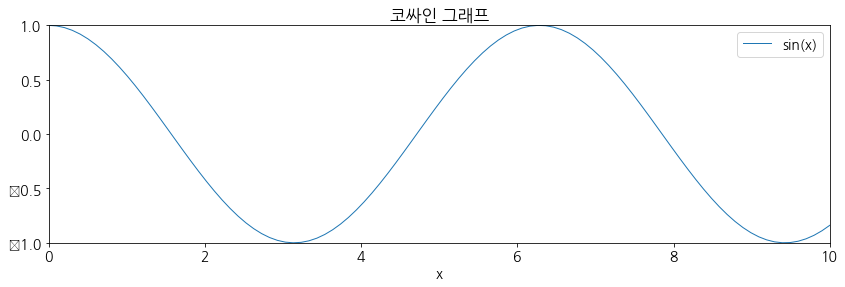

In [138]:
plt.plot(x,np.cos(x),'-',linewidth=1,label='sin(x)')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.title("코싸인 그래프")
plt.xlabel('x')
plt.legend()

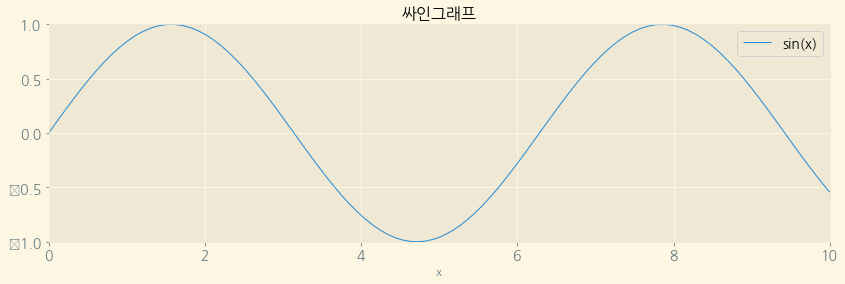

In [141]:
#스타일 컨테스트매니저를 이용하면 여러 타입으로 변경 가능
with plt.style.context('Solarize_Light2'):
    plt.plot(x,np.sin(x),'-',linewidth=1,label='sin(x)')
    plt.xlim(0,10)
    plt.ylim(-1,1)
    plt.title("싸인그래프")
    plt.xlabel('x')
    plt.legend()

In [147]:
def show(style):
    with plt.style.context(style):
        plt.plot(x,np.sin(x),'-',linewidth=2,label='sin(x)')
        plt.xlim(0,10)
        plt.ylim(-1,1)
        plt.title("싸인그래프")
        plt.xlabel('x')
        plt.legend()

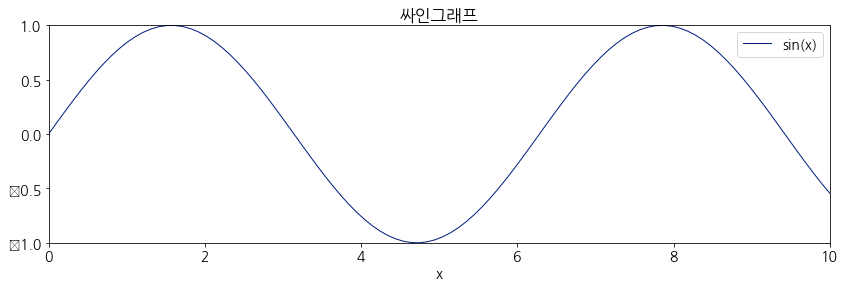

In [143]:
show('seaborn-dark-palette')

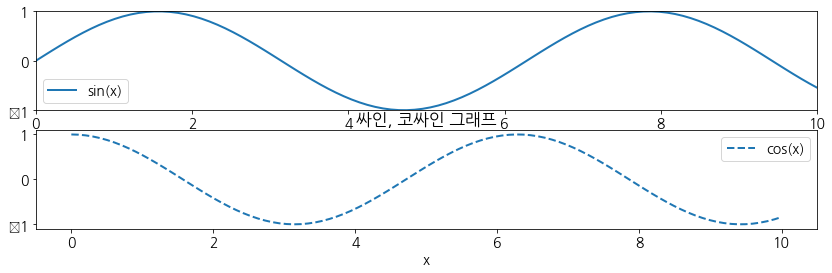

In [155]:
fig,ax =plt.subplots(2,1)
x=np.linspace(0,10,100)

ax[0].plot(x,np.sin(x),'-',linewidth=2,label='sin(x)')
ax[0].set_xlim(0,10)
ax[0].set_ylim(-1,1)
ax[0].legend()
ax[1].plot(x,np.cos(x),'--',linewidth=2,label='cos(x)')
ax[1].set_title("싸인, 코싸인 그래프")
ax[1].set_xlabel("x")
ax[1].legend()

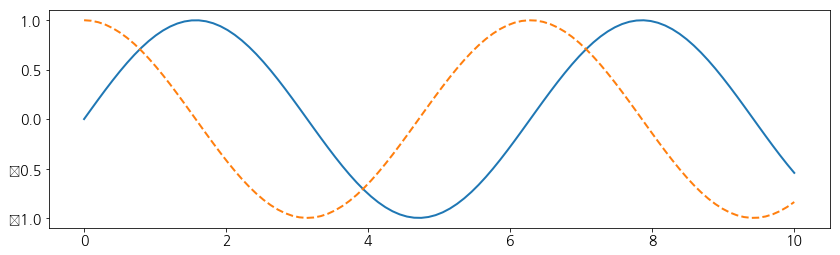

In [151]:
fig,ax =plt.subplots(1,1)
x=np.linspace(0,10,100)

ax.plot(x,np.sin(x),'-',linewidth=2,label='sin(x)')

ax.plot(x,np.cos(x),'--',linewidth=2,label='cos(x)')

ImportError: No module named 'urllib2'

In [160]:
import requests  

In [161]:
URL = 'http://apis.data.go.kr/1360000/VilageFcstInfoService/getVilageFcst?serviceKey=InL%2BjIA6ZUF8Fb0I3vYHVyGMlMaWz145Kt2ZzGFyuYhV9Jk7Wun800FRxJeZ9OvDRwCECHPU%2BPeDl%2BEoXR4qZw%3D%3D&pageNo=1&numOfRows=10&dataType=JSON&base_date=20201014&base_time=0500&nx=1&ny=1&'

resp=requests.get(URL)
data = resp.json()
data


{'response': {'body': {'dataType': 'JSON',
   'items': {'item': [{'baseDate': '20201014',
      'baseTime': '0500',
      'category': 'POP',
      'fcstDate': '20201014',
      'fcstTime': '0900',
      'fcstValue': '0',
      'nx': 1,
      'ny': 1},
     {'baseDate': '20201014',
      'baseTime': '0500',
      'category': 'PTY',
      'fcstDate': '20201014',
      'fcstTime': '0900',
      'fcstValue': '0',
      'nx': 1,
      'ny': 1},
     {'baseDate': '20201014',
      'baseTime': '0500',
      'category': 'REH',
      'fcstDate': '20201014',
      'fcstTime': '0900',
      'fcstValue': '60',
      'nx': 1,
      'ny': 1},
     {'baseDate': '20201014',
      'baseTime': '0500',
      'category': 'SKY',
      'fcstDate': '20201014',
      'fcstTime': '0900',
      'fcstValue': '1',
      'nx': 1,
      'ny': 1},
     {'baseDate': '20201014',
      'baseTime': '0500',
      'category': 'T3H',
      'fcstDate': '20201014',
      'fcstTime': '0900',
      'fcstValue': '21',
      'nx